### <img src=..\maxresdefault.jpg  width=200 height=100>

# UNIVERSIDAD DE LAS AMÉRICAS - UDLA
## MAESTRIA EN INTELIGENCIA DE NEGOCIO Y CIENCIA DE DATOS

## ANALÍTICA PREDICTIVA

### SEMANA 4

## TEMA
### S4- CASO PRACTICO-BDD FINAL - CASO WALLMART

## ESTUDIANTES
### Norian N. Pilco Bustamante
### José A. Játiva Ubillús

## TUTOR
### EC. MARCELA CEVALLOS. MA

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as sms
from sklearn.preprocessing import LabelEncoder


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [183]:
#Llamemos al module
print("S4- CASO PRACTICO-BDD FINAL")

S4- CASO PRACTICO-BDD FINAL



###  1. Importe la base de datos a una base en Jupyter Notebook con pandas.

In [184]:

ruta_archivo = r'/Users/jajub87/Downloads/Tarea 2/Walmart(1).csv'
df = pd.read_csv(ruta_archivo, delimiter=",")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

In [185]:
# Resumen de la base de datos
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [186]:
# Renombramos las columnas
df.rename({'Store':'Tienda', 'Date':'Fecha', 'Weekly_Sales': 'Ventas_Semanales', 
           'Holiday_Flag':'Feriado', 
           'Temperature': 'Temperatura', 'Fuel_Price':'Precio_Combustible',
          'CPI': 'Indice_Precios_Consumidor', 'Unemployment':'Tasa_Desempleo'}, axis=1, inplace=True),

(None,)

In [187]:
df

,Tienda,Fecha,Ventas_Semanales,Feriado,Temperatura,Precio_Combustible,Indice_Precios_Consumidor,Tasa_Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [188]:
df.dtypes

Tienda                         int64
Fecha                         object
Ventas_Semanales             float64
Feriado                        int64
Temperatura                  float64
Precio_Combustible           float64
Indice_Precios_Consumidor    float64
Tasa_Desempleo               float64
dtype: object

In [189]:
# Identifica variables numéricas y categóricas
varCuantitativas = df.select_dtypes('number').columns
varCualitativas  =df.select_dtypes('object').columns

In [190]:
varCuantitativas

Index(['Tienda', 'Ventas_Semanales', 'Feriado', 'Temperatura',
       'Precio_Combustible', 'Indice_Precios_Consumidor', 'Tasa_Desempleo'],
      dtype='object')

In [191]:
varCualitativas

Index(['Fecha'], dtype='object')

- Como podemos observar, la columna 'Fecha' se clasifica como una variable cualitativa (tipo objeto), lo cual es inusual para una columna de fecha en un conjunto de datos típico. Las fechas suelen ser tratadas como variables cuantitativas (tipo datetime o similar) en lugar de variables cualitativas. Esto podría deberse a que los datos en la columna 'Fecha' se almacenan como cadenas de texto en lugar de objetos de fecha y hora. Para realizar análisis de series temporales o trabajar con fechas de manera eficiente, generalmente es preferible que las fechas se almacenen como objetos de fecha y hora en lugar de cadenas.

In [192]:
#Convertir la columna 'Fecha' en un tipo de dato de fecha y hora
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y')

In [193]:
df.dtypes

Tienda                                int64
Fecha                        datetime64[ns]
Ventas_Semanales                    float64
Feriado                               int64
Temperatura                         float64
Precio_Combustible                  float64
Indice_Precios_Consumidor           float64
Tasa_Desempleo                      float64
dtype: object

In [194]:
# Identifica variables numéricas y categóricas
varCuantitativas = df.select_dtypes('number').columns
varCualitativas  =df.select_dtypes('object').columns

In [195]:
varCuantitativas

Index(['Tienda', 'Ventas_Semanales', 'Feriado', 'Temperatura',
       'Precio_Combustible', 'Indice_Precios_Consumidor', 'Tasa_Desempleo'],
      dtype='object')

In [196]:
varCualitativas

Index([], dtype='object')

### 3. Evalúe si la base contiene datos perdidos. 

In [197]:
# Evalúa los datos perdidos
df.isna().sum()

Tienda                       0
Fecha                        0
Ventas_Semanales             0
Feriado                      0
Temperatura                  0
Precio_Combustible           0
Indice_Precios_Consumidor    0
Tasa_Desempleo               0
dtype: int64

- Como se observa, no tenemos datos perdidos.

### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). 

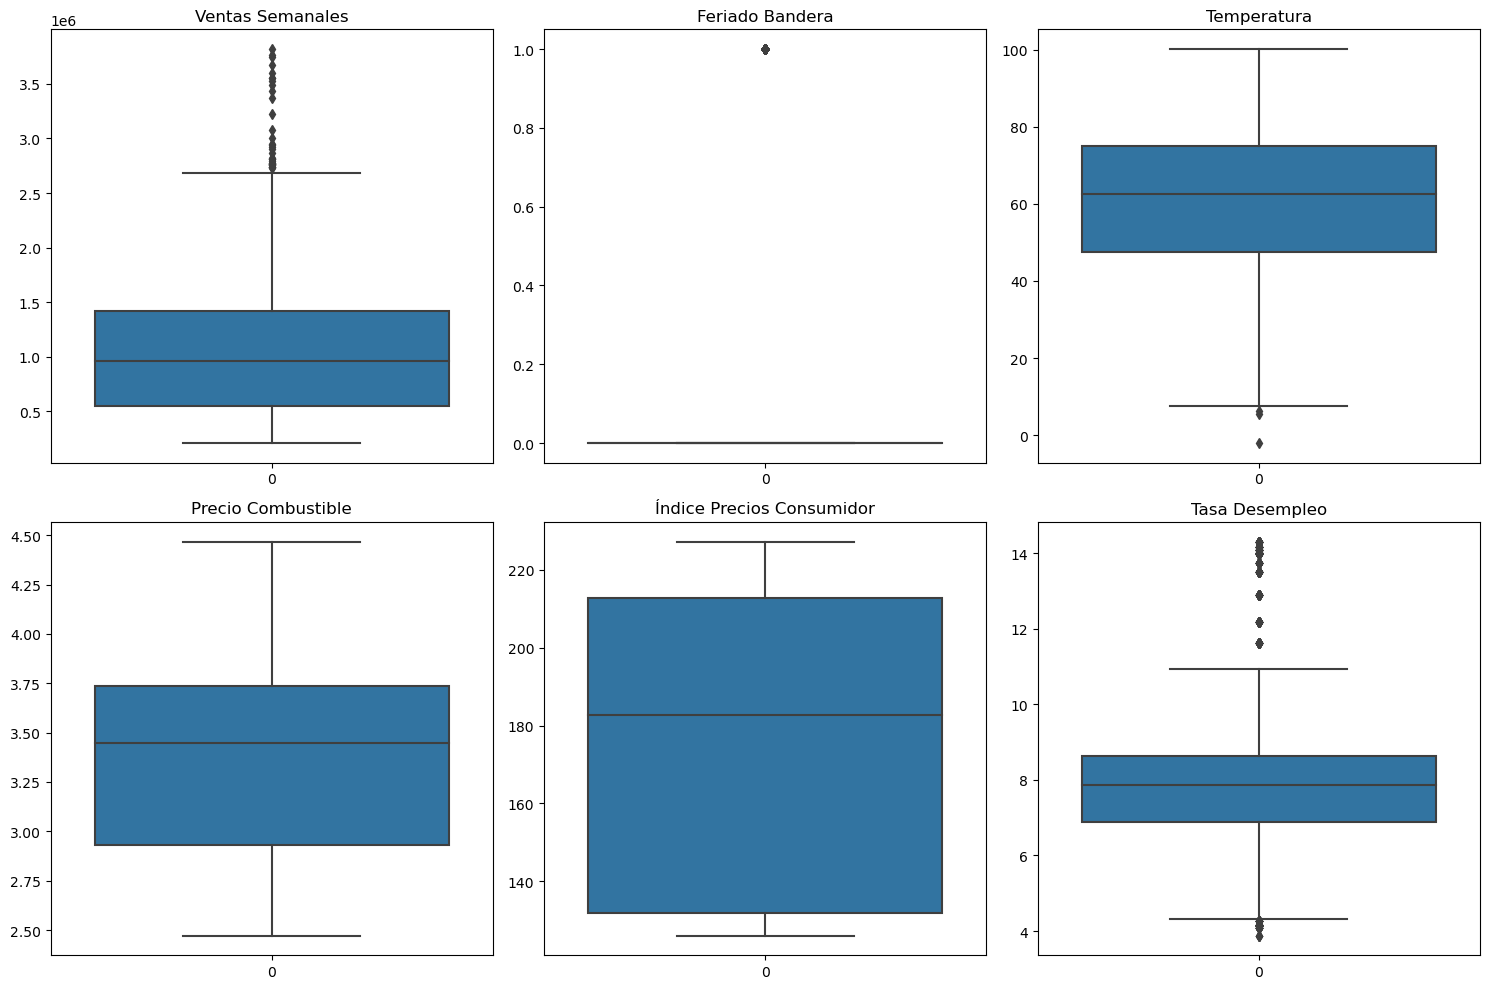

In [198]:
# Crear una figura con subplots 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Crear boxplots para las columnas específicas
sns.boxplot(df['Ventas_Semanales'], ax=axs[0, 0])
sns.boxplot(df['Feriado'], ax=axs[0, 1])
sns.boxplot(df['Temperatura'], ax=axs[0, 2])
sns.boxplot(df['Precio_Combustible'], ax=axs[1, 0])
sns.boxplot(df['Indice_Precios_Consumidor'], ax=axs[1, 1])
sns.boxplot(df['Tasa_Desempleo'], ax=axs[1, 2])

# Agregar títulos a los subplots
axs[0, 0].set_title('Ventas Semanales')
axs[0, 1].set_title('Feriado Bandera')
axs[0, 2].set_title('Temperatura')
axs[1, 0].set_title('Precio Combustible')
axs[1, 1].set_title('Índice Precios Consumidor')
axs[1, 2].set_title('Tasa Desempleo')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

- Como podemos observar, tanto la variable Ventas Semanales como la Tasa de Desempleo tiene valores por fuera del rango. Por lo que procedemos a depurarlos obtando por la eliminación de los outliers.

In [199]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Ventas_Semanales.quantile(0.25)
Q3 = df.Ventas_Semanales.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [200]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Ventas_Semanales'] < (Q1 - 1.5 * IQR)) |(df['Ventas_Semanales'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

<Axes: xlabel='Ventas_Semanales', ylabel='Density'>

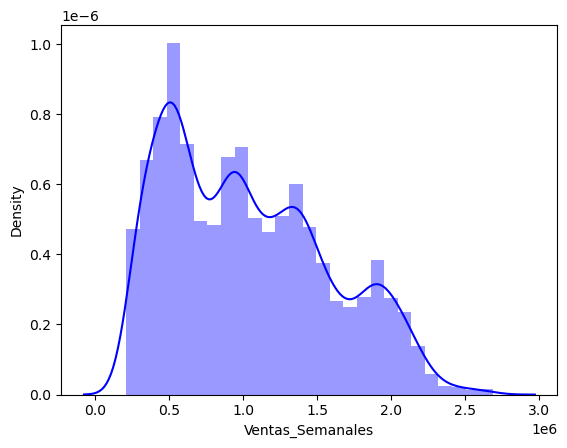

In [201]:
sns.distplot(df['Ventas_Semanales'],color="blue")

In [202]:
#Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Tasa_Desempleo.quantile(0.25)
Q3 = df.Tasa_Desempleo.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.7309999999999999


In [203]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Tasa_Desempleo'] < (Q1 - 1.5 * IQR)) |(df['Tasa_Desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

(5920, 8)

<Axes: xlabel='Tasa_Desempleo', ylabel='Density'>

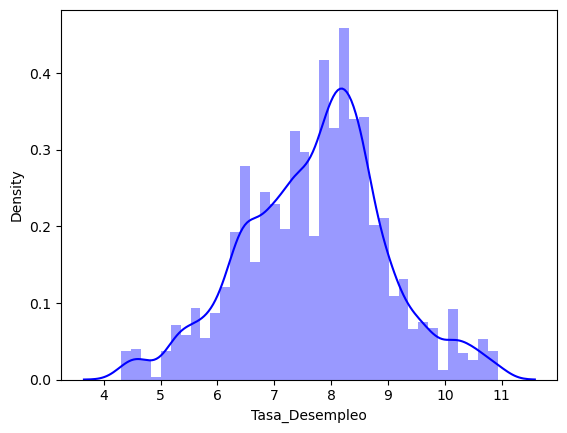

In [204]:
sns.distplot(df['Tasa_Desempleo'],color="blue")

In [205]:
df

,Tienda,Fecha,Ventas_Semanales,Feriado,Temperatura,Precio_Combustible,Indice_Precios_Consumidor,Tasa_Desempleo
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


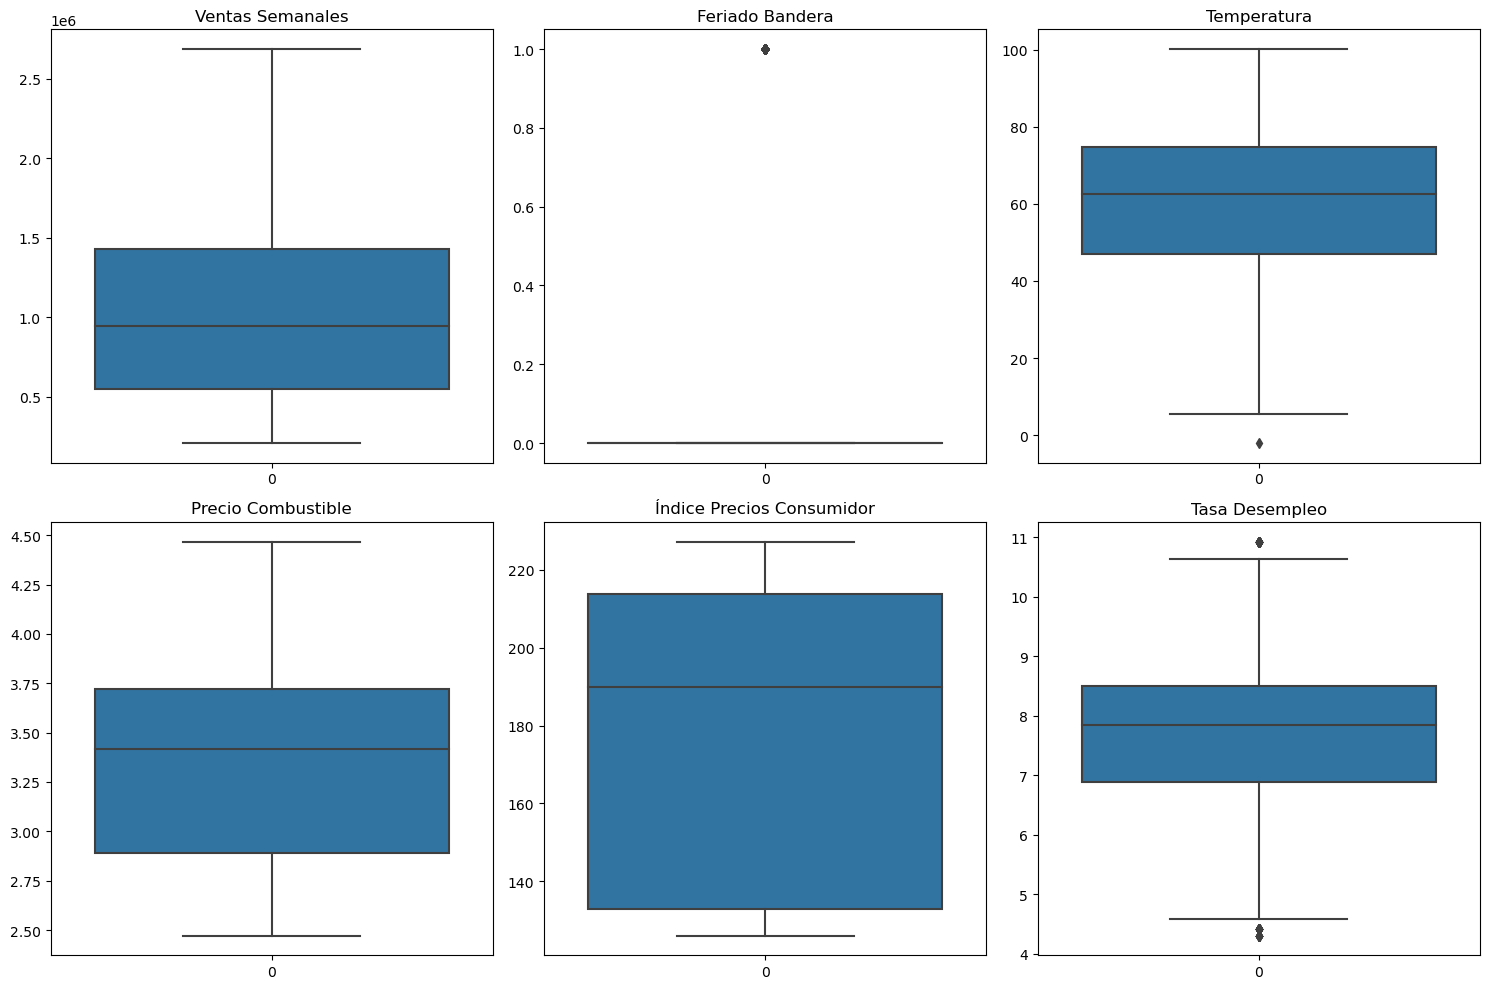

In [206]:
# Crear una figura con subplots 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Crear boxplots para las columnas específicas
sns.boxplot(df['Ventas_Semanales'], ax=axs[0, 0])
sns.boxplot(df['Feriado'], ax=axs[0, 1])
sns.boxplot(df['Temperatura'], ax=axs[0, 2])
sns.boxplot(df['Precio_Combustible'], ax=axs[1, 0])
sns.boxplot(df['Indice_Precios_Consumidor'], ax=axs[1, 1])
sns.boxplot(df['Tasa_Desempleo'], ax=axs[1, 2])

# Agregar títulos a los subplots
axs[0, 0].set_title('Ventas Semanales')
axs[0, 1].set_title('Feriado Bandera')
axs[0, 2].set_title('Temperatura')
axs[1, 0].set_title('Precio Combustible')
axs[1, 1].set_title('Índice Precios Consumidor')
axs[1, 2].set_title('Tasa Desempleo')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

### 5.Grafique las distribuciones de las variables y a priori comente sobre ellas.

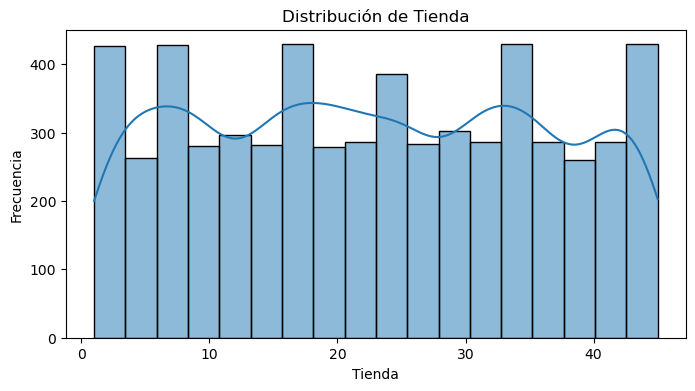

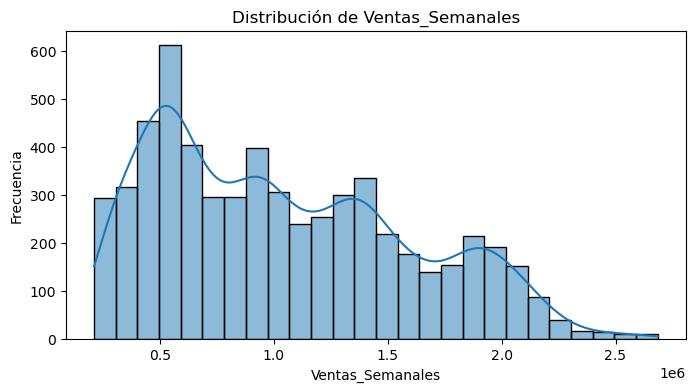

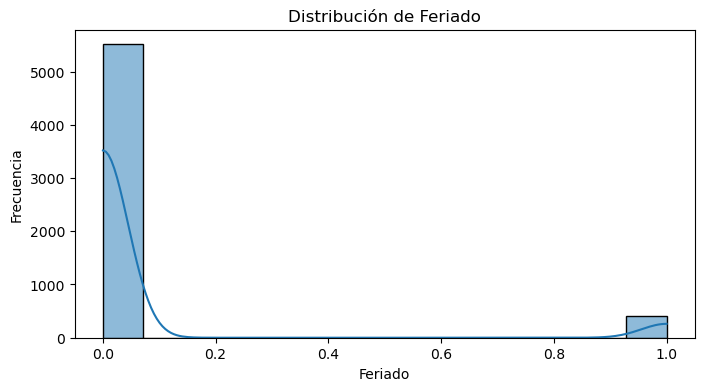

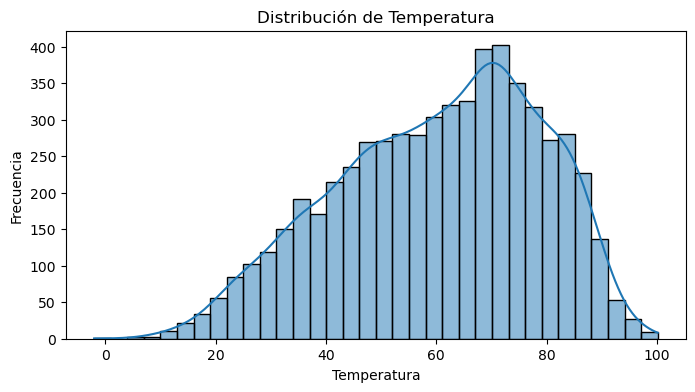

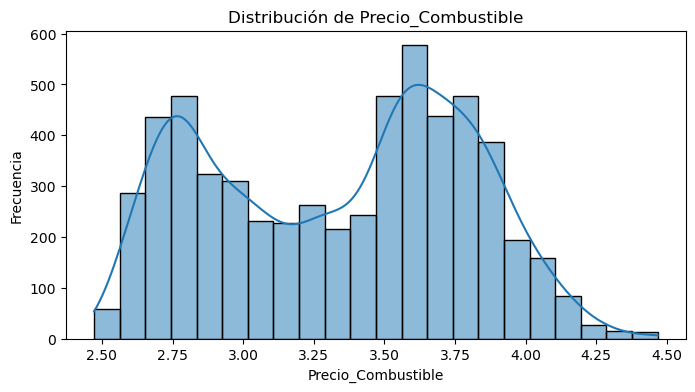

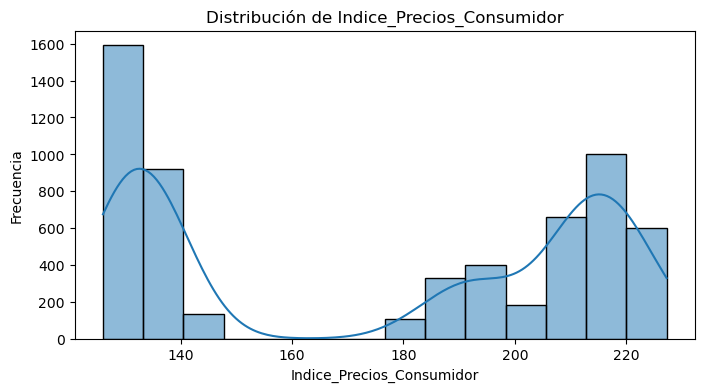

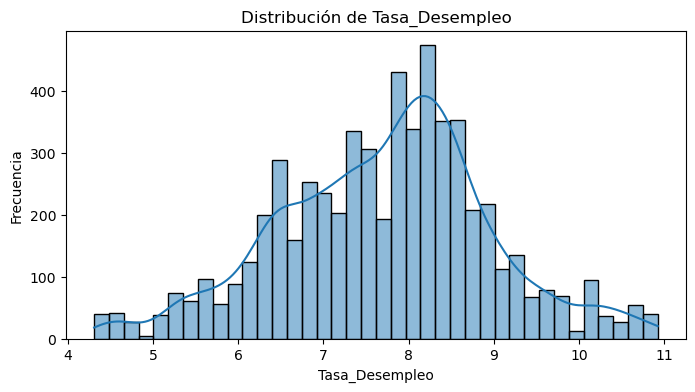

In [207]:
# Visualizar la distribución de variables numéricas
for var in varCuantitativas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

- Como podemos observar en las distintas distribuciones, podemos concluir:
    - Tienda: el número de la tienda. Esta distribución no tiene un significado considerando que se trata del ID de cada una la sucursales con las que cuenta Wallmart.
    - Ventas Semanales: Ventas para la tienda dada. Podemos observar que la distribución tiene un sesgo positivo.
    - Feriados: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva. No tiene mayor significacia su distribución ya que se trata de un SI o un NO. Podemos destacar que hay mayor cantidad de registros marcando que NO es feriado.
    - Temperatura: Temperatura el día de la venta. Podemos observar que la distribución tiene un sesgo negativo.
    - Precio de Combustible: costo del combustible en la región. Tenemos una distrubución bimodal. 
    - Indice de precios al consumidor vigente. Tenemos una distrubución bimodal.
    - Tasa de Desempleo: tasa de desempleo predominante. Podemos observar que la distribución que se acerca a la simetria.

### 6. Obtenga las correlaciones entre los datos de corte numérico.

In [208]:
df.corr().style.background_gradient(cmap='coolwarm')

,Tienda,Fecha,Ventas_Semanales,Feriado,Temperatura,Precio_Combustible,Indice_Precios_Consumidor,Tasa_Desempleo
Tienda,1.000000,-0.002631,-0.319128,0.004353,-0.026186,0.047717,-0.208596,0.309445
Fecha,-0.002631,1.000000,-0.007580,-0.011560,0.167068,0.776240,0.087644,-0.246474
Ventas_Semanales,-0.319128,-0.007580,1.000000,0.024442,-0.040918,0.019767,-0.082957,-0.073227
Feriado,0.004353,-0.011560,0.024442,1.000000,-0.156403,-0.076429,-0.000364,0.011014
Temperatura,-0.026186,0.167068,-0.040918,-0.156403,1.000000,0.145789,0.218164,0.023905
Precio_Combustible,0.047717,0.776240,0.019767,-0.076429,0.145789,1.000000,-0.144272,-0.105187
Indice_Precios_Consumidor,-0.208596,0.087644,-0.082957,-0.000364,0.218164,-0.144272,1.000000,-0.218764
Tasa_Desempleo,0.309445,-0.246474,-0.073227,0.011014,0.023905,-0.105187,-0.218764,1.000000


- Precio_Combustible y Fecha: Tienen una correlación de 0.776240, lo que indica una alta correlación positiva,tiene posibilidad de eliminarse si se necesita más adelante en mi analisis.

- Tasa_Desempleo y Fecha: Tienen una correlación de -0.246474, lo que indica una correlación negativa moderada. Esto significa que cuando la tasa de desempleo aumenta, el mes tiende a cambiar de manera sistemática. Puedes investigar más a fondo la razón detrás de esta correlación.

- Indice_Precios_Consumidor y Temperatura: Tienen una correlación de -0.218164, lo que indica una correlación negativa moderada. Esto podría sugerir que las fluctuaciones en el índice de precios al consumidor se relacionan de alguna manera con las variaciones en la temperatura.

### 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

- Realizaremos un análisis de todas las variables para determinar cuales son determinantes para la obtención del objetivo.


In [209]:
# Analizaremos todas las variables vamos a utilizar.
df_temp = df

### 8. Indique que tipo de modelación realizarán y porqué. 

- La elección del tipo de modelación se basa en la naturaleza de los datos y los objetivos del análisis. El dataset contiene datos relacionados con ventas semanales de tiendas walmart con una serie de características adicionales como la temperatura, el precio del combustible, la tasa de desempleo, entre otros. 

- Nuestro principal objetivo  es predecir las ventas semanales con respecto a las demás variables y modelación más adecuada sería la regresión porque es una técnica de Machine Learning que se utiliza para predecir una variable numérica  en función de una o más variables predictoras.

- Utilizaremos datos de panel ya que, los modelos de datos de panel permiten controlar tanto los efectos individuales como los efectos de tiempo. Esto significa que puedes tener en cuenta las diferencias entre las unidades individuales y las tendencias a lo largo del tiempo, lo que proporciona una comprensión más completa de la variabilidad en tus datos.

In [210]:
df_temp.describe()

,Tienda,Fecha,Ventas_Semanales,Feriado,Temperatura,Precio_Combustible,Indice_Precios_Consumidor,Tasa_Desempleo
count,5920.000000,5920,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000
mean,22.798142,2011-06-14 15:31:37.297297152,1.039202e+06,0.069088,60.404422,3.340395,175.010815,7.722377
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,2010-10-08 00:00:00,5.526404e+05,0.000000,46.965000,2.891000,132.766139,6.891000
50%,22.000000,2011-06-10 00:00:00,9.469219e+05,0.000000,62.610000,3.418500,190.006988,7.852000
75%,34.000000,2012-02-17 00:00:00,1.427444e+06,0.000000,74.722500,3.721000,213.793561,8.494000
max,45.000000,2012-10-26 00:00:00,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000
std,13.092635,NaN,5.518484e+05,0.253625,18.427013,0.458143,39.022611,1.243156


### 9 Verifique los supuestos, de haber escogido el enfoque econométrico. 

- Al tratarde de un enfoque econométrico, verificaremos la homocedasticidad .

### 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta

In [211]:
df_temp=df_temp.set_index(['Fecha','Tienda'])

In [212]:
fechas = df_temp.index.get_level_values('Fecha').to_list()
df_temp['Fecha'] = pd.Categorical(fechas)

In [213]:
#Pooled OLS
from linearmodels import PooledOLS
import statsmodels.api as sm

In [214]:
x = df_temp[['Indice_Precios_Consumidor', 'Tasa_Desempleo', 'Feriado', 'Temperatura', 'Precio_Combustible']]
x = sm.tools.tools.add_constant(x)
y = df_temp.Ventas_Semanales

In [215]:
modelo1 = PooledOLS(y,x)
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [216]:
#Guardamos los datos para examinarlos graficamente
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values
residuos_pooled_OLS = resultados_pooled_OLS.resids

In [217]:
resultados_pooled_OLS

Dep. Variable:,Ventas_Semanales,R-squared:,0.0165
Estimator:,PooledOLS,R-squared (Between):,0.0125
No. Observations:,5920,R-squared (Within):,0.0166
Date:,"Mon, Oct 09 2023",R-squared (Overall):,0.0165
Time:,13:29:45,Log-likelihood,-8.662e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,19.789
Entities:,143,P-value,0.0000
Avg Obs:,41.399,Distribution:,"F(5,5914)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,234.37


- R-squared (R²): El coeficiente de determinación (R²) es una medida de cuánta variabilidad en la variable dependiente es explicada por el modelo. En este caso, el R² global (R-squared Overall) es aproximadamente 0.0165, lo que significa que el modelo explica aproximadamente el 1.65% de la variabilidad en las ventas semanales. Es un valor bajo, lo que sugiere que el modelo puede no ser muy efectivo para explicar las ventas semanales.

- Coeficientes de Regresión: Los coeficientes estimados para las variables independientes son:
    - Indice_Precios_Consumidor: Este coeficiente representa la relación estimada entre la variable independiente "Indice_Precios_Consumidor" y la variable objetivo. En este caso, el coeficiente es -1431.7. Esto significa que, manteniendo todas las demás variables constantes, un aumento de una unidad en el índice de precios del consumidor se asocia con una disminución estimada de 1431.7 unidades en la variable objetivo.

    - Tasa_Desempleo: Este coeficiente representa la relación estimada entre la variable independiente "Tasa_Desempleo" y la variable objetivo. En este caso, el coeficiente es -42,370. Esto significa que, manteniendo todas las demás variables constantes, un aumento de una unidad en la tasa de desempleo se asocia con una disminución estimada de 42,370 unidades en la variable objetivo.

    - Feriado: Este coeficiente representa la relación estimada entre la variable independiente "Feriado" y la variable objetivo. En este caso, el coeficiente es 50,860. Esto significa que, manteniendo todas las demás variables constantes, un día festivo se asocia con un aumento estimado de 50,860 unidades en la variable objetivo. Sin embargo, el valor p (P-value) es relativamente alto (0.1793), lo que sugiere que la variable "Feriado" puede no ser estadísticamente significativa para explicar la variable objetivo.

    - Temperatura: Este coeficiente representa la relación estimada entre la variable independiente "Temperatura" y la variable objetivo. En este caso, el coeficiente es -380.75. Esto significa que, manteniendo todas las demás variables constantes, un aumento de una unidad en la temperatura se asocia con una disminución estimada de 380.75 unidades en la variable objetivo. Al igual que "Feriado", el valor p es alto (0.3720), lo que sugiere que "Temperatura" puede no ser estadísticamente significativa.

    - Precio_Combustible: Este coeficiente representa la relación estimada entre la variable independiente "Precio_Combustible" y la variable objetivo. En este caso, el coeficiente es -1492.9. Esto significa que, manteniendo todas las demás variables constantes, un aumento de una unidad en el precio del combustible se asocia con una disminución estimada de 1492.9 unidades en la variable objetivo. Al igual que las anteriores, el valor p es alto (0.8751), lo que sugiere que "Precio_Combustible" puede no ser estadísticamente significativa.


Según este modelo, las variables 'Indice_Precios_Consumidor', 'Tasa_Desempleo' están relacionadas con las ventas semanales, y sus coeficientes sugieren que un aumento en el índice de precios del consumidor y un aumento en la tasa de desempleo están asociados con disminuciones en las ventas semanales. 

Por otra parte 'Feriado', 'Temperatura' y 'Precio_Combustible' por lo que no guardan relación significativa con nuestro campo objetivo.

Sin embargo, el bajo valor de R² indica que estas variables explican solo una pequeña parte de la variabilidad en las ventas, y es posible que haya otras variables no incluidas en el modelo que también influyan en las ventas semanales.

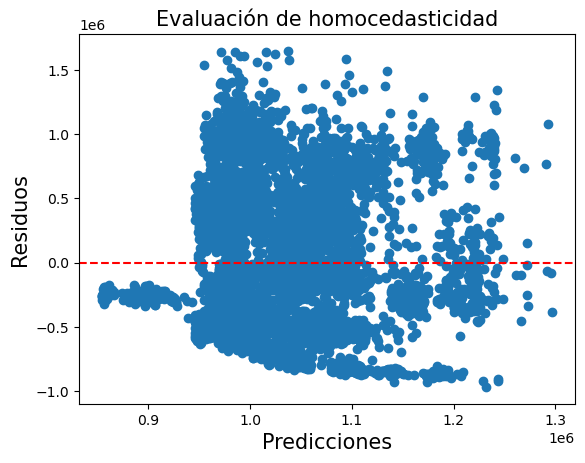

In [218]:
#Verificación de los supuestos de la Regresión Pooled OLS
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color='r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 15)
plt.show()

In [219]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [223]:
pooled_OLS_df = pd.concat([df_temp,residuos_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['Fecha'], axis =1).fillna(0)
x_ = sm.tools.tools.add_constant(df['Ventas_Semanales']).fillna(0)

In [224]:
pooled_OLS_df

,,Ventas_Semanales,Feriado,Temperatura,Precio_Combustible,Indice_Precios_Consumidor,Tasa_Desempleo,residual
Fecha,Tienda,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,667884.526445
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,614019.591593
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,635445.026160
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,435869.303686
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,581038.106436
...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,-254739.056583
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667,-234967.852374
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667,-237679.024395


In [225]:
breusch_pagan = het_breuschpagan(pooled_OLS_df.residual, x_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F-p-val']
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 1117.9106311545675, 'LM p-val': 4.228046061368799e-245, 'F-Stat': 1377.6909605419037, 'F-p-val': 2.689190758737441e-271}


LM-Stat (Estadística de prueba de L-M): 1117.91
LM p-val (Valor p de la estadística de prueba de L-M): 4.23e-245
F-Stat (Estadística F): 1377.69
F-p-val (Valor p de la estadística F): 2.68e-271

- El valor extremadamente bajo del valor p (LM p-val y F-p-val) sugiere que hay evidencia significativa en contra de la hipótesis nula de que no hay heteroscedasticidad en el modelo. En otras palabras, los errores del modelo no tienen una varianza constante.

- La estadística de prueba de L-M (LM-Stat) y la estadística F (F-Stat) son bastante altas, lo que indica que hay una cantidad sustancial de heteroscedasticidad presente en el modelo.

Los resultados del test de Breusch-Pagan sugieren fuertemente la presencia de heteroscedasticidad en el modelo. Esto significa que la varianza de los errores no es constante en todas las observaciones y podría cambiar en función de los valores de las variables independientes.

In [226]:
from statsmodels.stats.stattools import durbin_watson

In [227]:
durbin_watson = durbin_watson(pooled_OLS_df.residual)
print (durbin_watson)

0.08767442835798936


- El valor de Durbin-Watson es significativamente menor que 2 (0.0876), lo que sugiere la presencia de autocorrelación positiva en los residuos. Esto significa que los errores en tu modelo de regresión están correlacionados positivamente entre observaciones sucesivas.


En base a los resultados obtenidos, utilizaremos ahora solo las 'Ventas_Semanales' como variable dependiente y las variables "Indice_Precios_Consumidor" y "Tasa_Desempleo" como independientes, ya que se espera conocer como se ven afectadas las ventas en base al resto de variables.

#### Modelo de Efectos Fijos "fixed effects"

In [228]:
# Simplificar variables que no vamos a utilizar.
df_temp=df[['Fecha', 'Ventas_Semanales', 'Indice_Precios_Consumidor', 'Tasa_Desempleo' , 'Tienda']]

In [229]:
df_temp

,Fecha,Ventas_Semanales,Indice_Precios_Consumidor,Tasa_Desempleo,Tienda
0,2010-02-05,1643690.90,211.096358,8.106,1
1,2010-02-12,1641957.44,211.242170,8.106,1
2,2010-02-19,1611968.17,211.289143,8.106,1
3,2010-02-26,1409727.59,211.319643,8.106,1
4,2010-03-05,1554806.68,211.350143,8.106,1
...,...,...,...,...,...
6430,2012-09-28,713173.95,192.013558,8.684,45
6431,2012-10-05,733455.07,192.170412,8.667,45
6432,2012-10-12,734464.36,192.327265,8.667,45
6433,2012-10-19,718125.53,192.330854,8.667,45


In [239]:
#Pooled OLS
from linearmodels import PooledOLS
import statsmodels.api as sm

In [240]:
df_temp=df_temp.set_index(['Fecha','Tienda'])
fechas = df_temp.index.get_level_values('Fecha').to_list()
df_temp['Fecha'] = pd.Categorical(fechas)

x = df_temp[['Indice_Precios_Consumidor', 'Tasa_Desempleo']]
x = sm.tools.tools.add_constant(x)
y = df_temp.Ventas_Semanales

In [241]:
from linearmodels import PanelOLS

In [242]:
modelo_fe = PanelOLS(y, x, entity_effects=True)
resultados_fe = modelo_fe.fit()

In [243]:
resultados_fe

Dep. Variable:,Ventas_Semanales,R-squared:,0.0167
Estimator:,PanelOLS,R-squared (Between):,-0.0362
No. Observations:,5920,R-squared (Within):,0.0167
Date:,"Mon, Oct 09 2023",R-squared (Overall):,0.0156
Time:,13:44:48,Log-likelihood,-8.656e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,49.011
Entities:,143,P-value,0.0000
Avg Obs:,41.399,Distribution:,"F(2,5775)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,49.011


#### Modelo de Efectos Aleatorios "random effects"

In [244]:
from linearmodels import RandomEffects

In [245]:
modelo_re = RandomEffects(y, x)
resultados_re = modelo_re.fit()

In [246]:
resultados_re

Dep. Variable:,Ventas_Semanales,R-squared:,0.0157
Estimator:,RandomEffects,R-squared (Between):,-0.0331
No. Observations:,5920,R-squared (Within):,0.0167
Date:,"Mon, Oct 09 2023",R-squared (Overall):,0.0157
Time:,13:44:59,Log-likelihood,-8.662e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,47.040
Entities:,143,P-value,0.0000
Avg Obs:,41.399,Distribution:,"F(2,5917)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,47.040


#### Test de Haussman

In [247]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [248]:
def hausman (fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b-B))
    
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [249]:
hausman = hausman (resultados_fe, resultados_re)

In [250]:
print ('chi-Squared: ' + str(hausman[0]))
print ('degreess of freedom: ' + str(hausman[1]))
print ('p-Value: ' + str(hausman[2]))

chi-Squared: 6.091276598506815
degreess of freedom: 3
p-Value: 0.10725288852490725


El objetivo de la prueba de Hausman es evaluar si las diferencias entre las estimaciones de los coeficientes obtenidas en un modelo de efectos aleatorios y un modelo de efectos fijos son estadísticamente significativas. Si el valor p es significativamente bajo (generalmente por debajo de un nivel de significancia como 0.05 o 0.01), se rechaza la hipótesis nula y se concluye que uno de los modelos es preferible sobre el otro.

- En tu caso, el valor p es 0.10725288852490725, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que las diferencias entre las estimaciones de los coeficientes en el modelo de efectos aleatorios y el modelo de efectos fijos no son estadísticamente significativas.

En términos prácticos, esto significa que, en base a la prueba de Hausman, no hay una preferencia clara entre utilizar un modelo de efectos aleatorios o un modelo de efectos fijos para tus datos de panel. Ambos modelos pueden ser apropiados para tu análisis, y la elección entre ellos puede depender de consideraciones adicionales y del contexto de tu investigación.

### 11. Grafique a los valores predicho de modelo vs los valores reales.

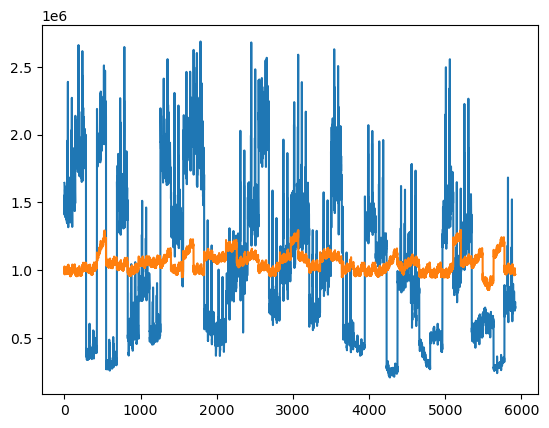

In [251]:
#Visualizar valores Observados vs Valores predichos
fig, ax = plt.subplots()
ax.plot(y.values)
ax.plot(predicciones_pooled_OLS.values)

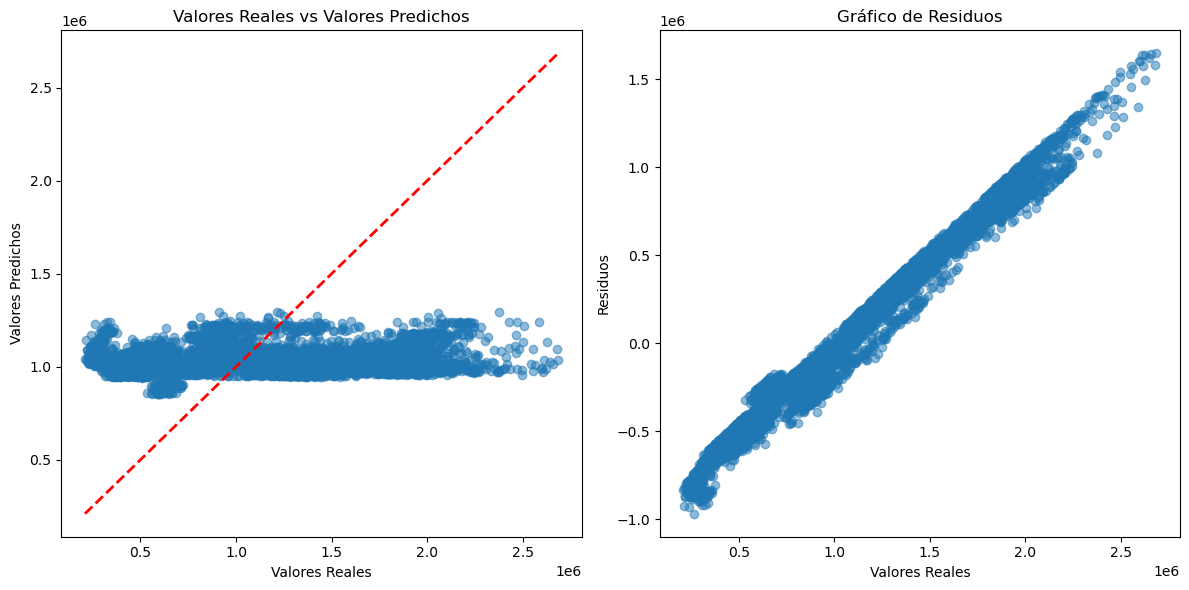

In [252]:
# Supongamos que 'y_real' son los valores reales y 'predicciones_pooled_OLS' son las predicciones de tu modelo
y_real = y.values
predicciones = predicciones_pooled_OLS.values

# Crear un gráfico de dispersión (scatter plot) para comparar los valores reales y predichos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Crear un subplot para los valores reales vs. predichos
plt.scatter(y_real, predicciones, alpha=0.5)  # alpha controla la transparencia de los puntos
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')

# Agregar una línea de referencia 45 grados para comparar con la línea de regresión ideal
plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle='--', color='red', linewidth=2)

# Crear un gráfico de residuos
plt.subplot(1, 2, 2)
plt.scatter(y_real, residuos_pooled_OLS, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el espacio entre los subplots
plt.show()

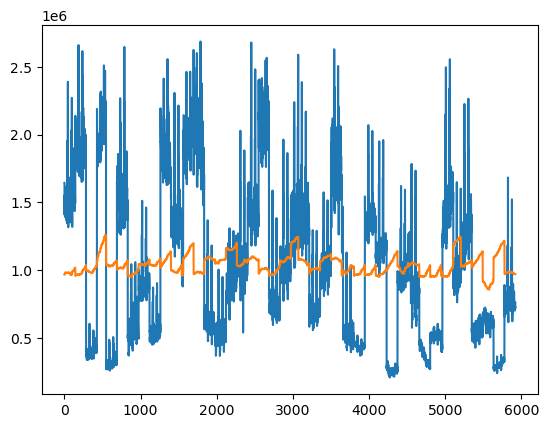

In [253]:
#Visualizar valores Observados vs Valores predichos
predicciones_fe = resultados_fe.predict()
fig, ax = plt.subplots()
ax.plot(y.values)
ax.plot(predicciones_fe.values)

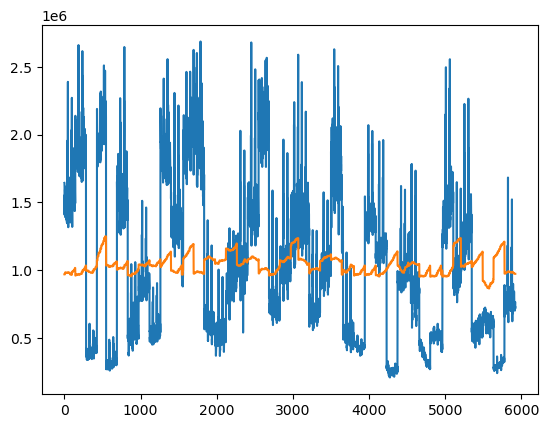

In [254]:
#Visualizar valores Observados vs Valores predichos
predicciones_re = resultados_re.predict()
fig, ax = plt.subplots()
ax.plot(y.values)
ax.plot(predicciones_re.values)

### 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 

- Como lo pudimos observar, las variables seleccionadas son las de mayor determinación para el modelo.

- Interpretarremos los coeficientes de las variables independientes en el modelo:

    - const: El coeficiente para la constante es de aproximadamente 1.647e+06. Esto representa el valor estimado de las ventas semanales cuando todas las variables independientes son iguales a cero. Sin embargo, dado que algunas de las variables independientes son económicas (como el índice de precios al consumidor y la tasa de desempleo), no tiene una interpretación práctica directa.

    - Indice_Precios_Consumidor: El coeficiente para esta variable es de aproximadamente -1477.7. Un valor negativo indica que, en promedio, un aumento en el índice de precios al consumidor está asociado con una disminución en las ventas semanales. El valor t es -7.8898, lo que sugiere que este coeficiente es estadísticamente significativo.

    - Tasa_Desempleo: El coeficiente para la tasa de desempleo es de aproximadamente -4.522e+04. Al igual que con el índice de precios al consumidor, un valor negativo indica que, en promedio, un aumento en la tasa de desempleo está asociado con una disminución en las ventas semanales. El valor t es -7.4614, lo que sugiere que este coeficiente también es estadísticamente significativo.